In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans # Import the KMeans class from sklearn.cluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#  Replace 'your_file.csv' with the correct path to your CSV file
file_path_1 = '/content/drive/My Drive/rfm_data.csv'
file_path_2 = '/content/drive/My Drive/df1.csv'

# Load the CSV file
df_1 = pd.read_csv(file_path_1)
df_2 = pd.read_csv(file_path_2)

# Display the first few rows of the DataFrame
df_1.head()


,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,12346,325,2,0.00,5.70,2.49,2.49,0.15,Lost Customers
1,12347,38,182,4310.00,80.90,88.13,88.13,4.35,High value Customer
2,12348,74,31,1797.24,61.25,42.07,42.07,2.25,Low Value Customers
3,12349,18,73,1757.55,87.90,66.72,66.72,3.49,Medium Value Customer
4,12350,309,17,334.40,11.07,24.79,24.79,1.14,Lost Customers


In [ ]:
df_2.head()

,InvoiceNo,InvoiceCounts,InvoicePrice
0,536365,7,139.12
1,536366,2,22.20
2,536367,12,278.73
3,536368,4,70.05
4,536369,1,17.85


In [ ]:
#3Declare feature vector and target variable
X = df_2['InvoiceCounts']
y= df_2['InvoicePrice']


show the relation between invoice price and invoice count..

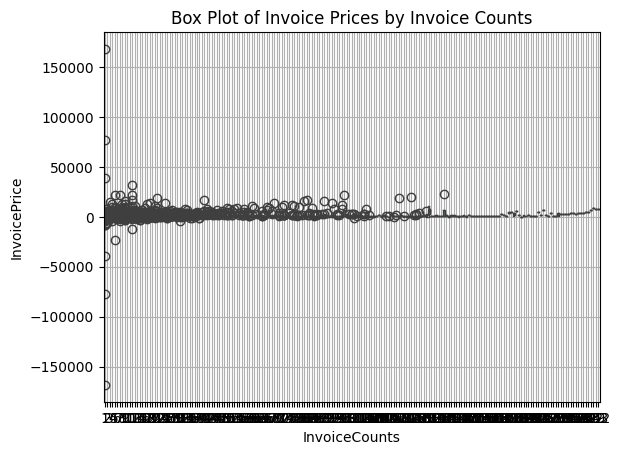

In [ ]:
import seaborn as sns

# Create a DataFrame
import pandas as pd
df = pd.DataFrame(df_2)

# Box plot
# Changed 'Invoice Counts' to 'InvoiceCounts' to match your dataframe's column name
sns.boxplot(x='InvoiceCounts', y='InvoicePrice', data=df)
plt.title('Box Plot of Invoice Prices by Invoice Counts')
plt.grid(True)
plt.show()

In [ ]:
#Split the data Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.80)


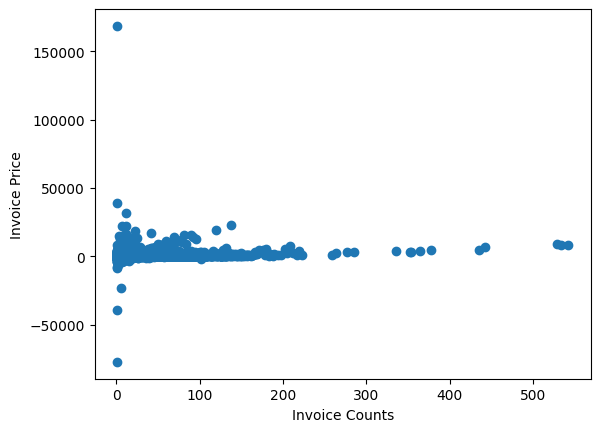

In [ ]:
#Plot of Train Data
plt.scatter(X_train, y_train)
plt.xlabel('Invoice Counts')
plt.ylabel('Invoice Price')
plt.show()

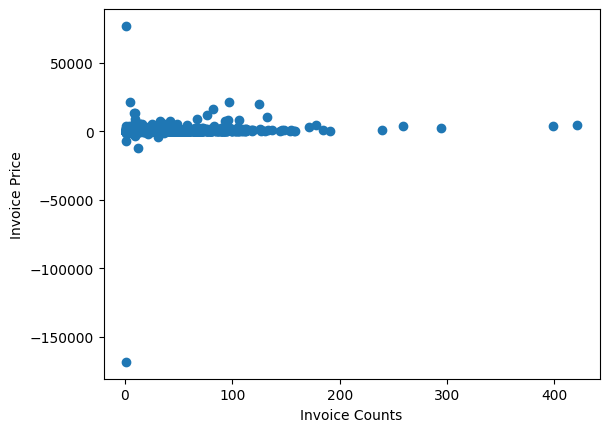

In [ ]:
#Plot of Test Data
plt.scatter(X_test, y_test)
plt.xlabel('Invoice Counts')
plt.ylabel('Invoice Price')
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score  # Import DBI

# Combine X and y into a 2D array for both train and test
data_train = np.column_stack((X_train, y_train))
data_test = np.column_stack((X_test, y_test))

# Apply MinMax scaling
scaler = MinMaxScaler()
data_scaled_train = scaler.fit_transform(data_train)
data_scaled_test = scaler.transform(data_test)  # Use transform here instead of fit_transform to prevent data leakage

# Check scaled values (first four rows)
print(data_scaled_train[:4])
print(data_scaled_test[:4])


[[0.00184843 0.31547482]
 [0.04436229 0.31590633]
 [0.04251386 0.31666597]
 [0.0702403  0.31741125]]
[[0.         0.31578502]
 [0.00554529 0.31682535]
 [0.02218115 0.31517196]
 [0.03512015 0.31581258]]


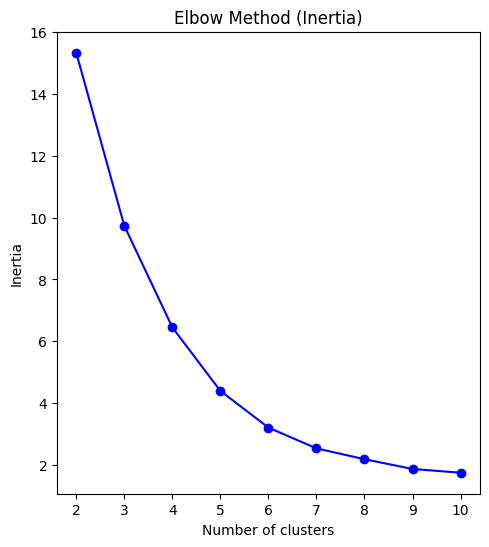

Inertias for clusters 2-10: [15.335091737678052, 9.73794817165344, 6.449255635143284, 4.393953932514631, 3.206141788001693, 2.534183071412588, 2.183146524376498, 1.8673248135549116, 1.745986922500885]
Silhouette scores for clusters 2-10: [0.7167516693372105, 0.6240881000282901, 0.6086734189103006, 0.6107590104721784, 0.603462301261545, 0.5982684099747629, 0.5728323954439486, 0.571398164007003, 0.5711748933394866]

Optimal number of clusters based on Silhouette Score: 2


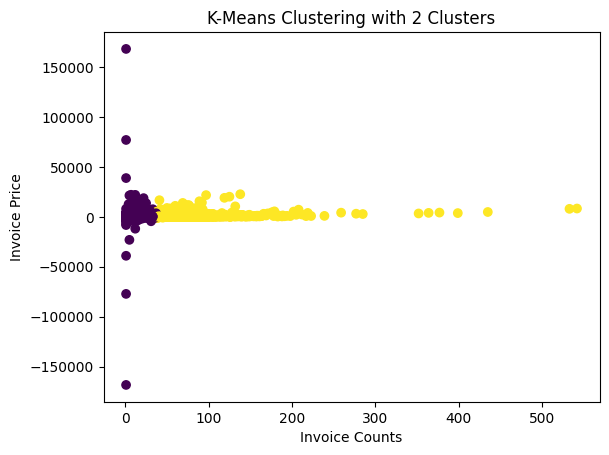


Silhouette Score for 2 clusters: 0.7168

Cluster centers are:
[[0.01950793 0.50089264]
 [0.1151323  0.50246212]]

K-Means Inertia: 15.335091737678052


In [22]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Set a seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Declare feature vector and target variable
X = df_2['InvoiceCounts']
y = df_2['InvoicePrice']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed, train_size=0.80)

# Combine X and y into a 2D array for both train and test
data_train = np.column_stack((X_train, y_train))

# Apply MinMax scaling
scaler = MinMaxScaler()
data_scaled_train = scaler.fit_transform(data_train)

# Elbow method to find the optimal number of clusters
inertias = []
sil_scores = []

for i in range(2, 11):  # Adjusted the range to match the plotting range
    kmeans = KMeans(n_clusters=i, random_state=random_seed)
    kmeans.fit(data_scaled_train)
    inertias.append(kmeans.inertia_)
    sil_score = silhouette_score(data_scaled_train, kmeans.labels_, metric='euclidean')
    sil_scores.append(sil_score)

# Plot the inertia and silhouette score values to visualize the Elbow method
plt.figure(figsize=(12, 6))

# Plot for inertia (Elbow method)
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertias, marker='o', color='blue')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('/content/drive/My Drive/images/Elbow method_plot.png')

# Plot for Silhouette Scores
#plt.subplot(1, 2, 2)
#plt.plot(range(2, 11), sil_scores, marker='o', color='green')
#plt.title('Silhouette Scores')
#plt.xlabel('Number of clusters')
#plt.ylabel('Silhouette Score')

plt.show()

# Print out silhouette scores for review
print(f"Inertias for clusters 2-10: {inertias}")
print(f"Silhouette scores for clusters 2-10: {sil_scores}")

# Find the number of clusters that gives the highest silhouette score
optimal_clusters = np.argmax(sil_scores) + 2  # Adding 2 because range starts from 2

# K-Means with the optimal number of clusters
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_clusters}")
kmeans = KMeans(n_clusters=optimal_clusters, random_state=random_seed)
kmeans.fit(data_scaled_train)

# Plot the clusters for train data
plt.scatter(X_train, y_train, c=kmeans.labels_, cmap='viridis')
plt.title(f"K-Means Clustering with {optimal_clusters} Clusters")
plt.xlabel('Invoice Counts')
plt.ylabel('Invoice Price')
plt.show()

# Check the silhouette score for the chosen cluster number
sil_score = silhouette_score(data_scaled_train, kmeans.labels_, metric='euclidean')
print(f'\nSilhouette Score for {optimal_clusters} clusters: {sil_score:.4f}')

# Print the cluster centers and inertia
print('\nCluster centers are:')
print(kmeans.cluster_centers_)
print(f'\nK-Means Inertia: {kmeans.inertia_}')


[[0.00184843 0.49998516]
 [0.04805915 0.50025135]
 [0.02033272 0.50043293]
 [0.05545287 0.50040826]]
[[0.01109057 0.50099045]
 [0.         0.49994747]
 [0.01109057 0.50085624]
 [0.02033272 0.50096581]]


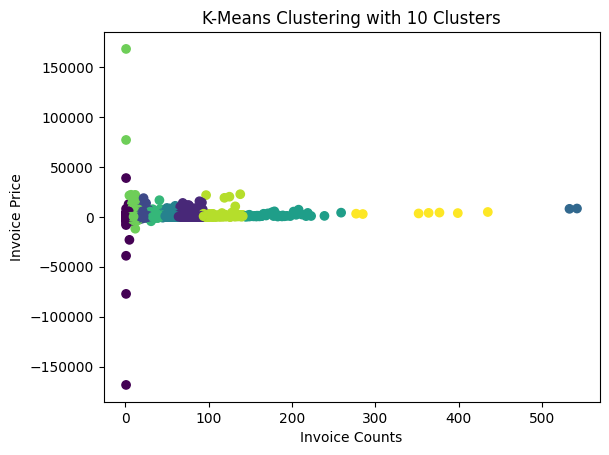

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score  # Import DBI

# Combine X and y into a 2D array for both train and test
data_train = np.column_stack((X_train, y_train))
data_test = np.column_stack((X_test, y_test))

# Apply MinMax scaling
scaler = MinMaxScaler()
data_scaled_train = scaler.fit_transform(data_train)
data_scaled_test = scaler.transform(data_test)  # Use transform here instead of fit_transform to prevent data leakage

# Check scaled values (first four rows)
print(data_scaled_train[:4])
print(data_scaled_test[:4])

# K-Means with 5 clusters (or you can adjust based on the elbow method)
optimal_clusters = 10  # Adjust this based on elbow results
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(data_scaled_train)

# Plot the clusters
plt.scatter(X_train, y_train, c=kmeans.labels_, cmap='viridis')
plt.title(f"K-Means Clustering with {optimal_clusters} Clusters")
plt.xlabel('Invoice Counts')
plt.ylabel('Invoice Price')
plt.savefig('/content/drive/My Drive/images/K-Means with 5 clusters_plot.png')
plt.show()



# Check the silhouette score for the chosen cluster number
sil_score = silhouette_score(data_scaled_train, kmeans.labels_, metric='euclidean')
print(f'\nSilhouette Score for {optimal_clusters} clusters: {sil_score:.4f}')

# Calculate and print the Davies-Bouldin Index
db_index = davies_bouldin_score(data_scaled_train, kmeans.labels_)
print(f'Davies-Bouldin Index for {optimal_clusters} clusters: {db_index:.4f}')

**GMM Algorithm**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_train)

# Prepare to track the best Silhouette Score and model
best_sil_score = -1
best_model = None

# Set random seed for reproducibility
random_seed = 42

# Loop through n_components: 2, 3, and 4 with covariance_type='tied'
for n_components in range(2, 6):  # 2, 3, 4 clusters
    gmm = GaussianMixture(n_components=n_components, covariance_type='tied', n_init=20,
                          init_params='kmeans', random_state=random_seed)
    gmm.fit(scaled_df)

    # Predict cluster labels
    labels = gmm.predict(scaled_df)

    # Calculate Silhouette Score
    sil_score = silhouette_score(scaled_df, labels)

    print(f'n_components: {n_components}, Silhouette Score: {sil_score:.4f}')

    # Track the best model
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_model = gmm



n_components: 2, Silhouette Score: 0.9871
n_components: 3, Silhouette Score: 0.7575
n_components: 4, Silhouette Score: 0.7583
n_components: 5, Silhouette Score: 0.7628


n_components: 2, Silhouette Score: 0.9871
Davies-Bouldin Index: 0.0092


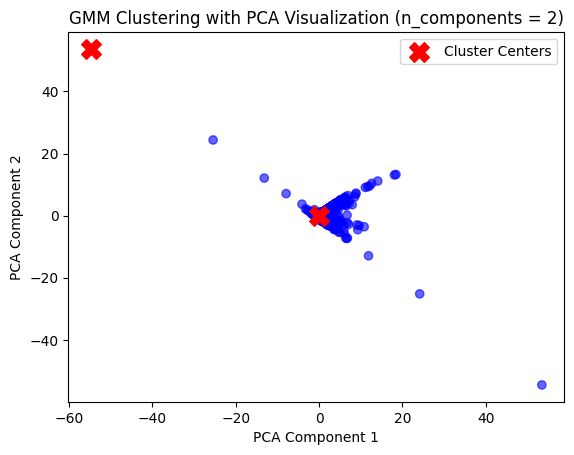

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA  # Import PCA
import matplotlib.pyplot as plt
import numpy as np


# Convert data_train to DataFrame with column names
data_train_df = pd.DataFrame(data_train, columns=['InvoiceCounts', 'InvoicePrice'])  # Replace with actual column names

# Standardize data before adding the 'Customer_Segment' column
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_train_df[['InvoiceCounts', 'InvoicePrice']])  # Only scale numerical features

# Apply PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_df = pca.fit_transform(scaled_df)

# Set random seed for reproducibility
random_seed = 42

# Use Gaussian Mixture Model for n_components=5
n_components = 2  # Set the best number of components based on previous results
gmm = GaussianMixture(n_components=n_components, covariance_type='tied', n_init=20,
                      init_params='kmeans', random_state=random_seed)
gmm.fit(pca_df)

# Predict cluster labels
labels = gmm.predict(pca_df)

# Calculate Silhouette Score
sil_score = silhouette_score(pca_df, labels)
print(f'n_components: {n_components}, Silhouette Score: {sil_score:.4f}')

# Calculate Davies-Bouldin Index (DBI)
dbi_score = davies_bouldin_score(pca_df, labels)
print(f'Davies-Bouldin Index: {dbi_score:.4f}')  # Print DBI score

# Create a mapping of cluster labels to customer segments
customer_segments = {i: f'Segment {i + 1}' for i in range(n_components)}

# Map the labels to segments and create a new column in the DataFrame
data_train_df['Customer_Segment'] = [customer_segments[label] for label in labels.astype(int)]  # Use the DataFrame

# Visualizing the clustering with PCA-reduced data
plt.scatter(pca_df[:, 0], pca_df[:, 1], c=labels, cmap=plt.cm.winter, alpha=0.60)

# Visualize cluster centers
centers = gmm.means_  # Get the means (centers) of the clusters
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title(f'GMM Clustering with PCA Visualization (n_components = {n_components})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.savefig('/content/drive/My Drive/images/gmm_pca_plot.png')
plt.show()